# Rainbow Charts

http://www.binarytribune.com/forex-trading-indicators/rainbow-charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
# R=red, O=orange, Y=yellow, G=green, B=blue, I = indigo, and V=violet
df['Red'] = df['Adj Close'].rolling(2).mean()
df['Orange'] = df['Red'].rolling(2).mean()
df['Yellow'] = df['Orange'].rolling(2).mean() 
df['Green'] = df['Yellow'].rolling(2).mean()
df['Blue'] = df['Green'].rolling(2).mean()
df['Indigo'] = df['Blue'].rolling(2).mean()
df['Violet'] = df['Indigo'].rolling(2).mean()
df = df.dropna()

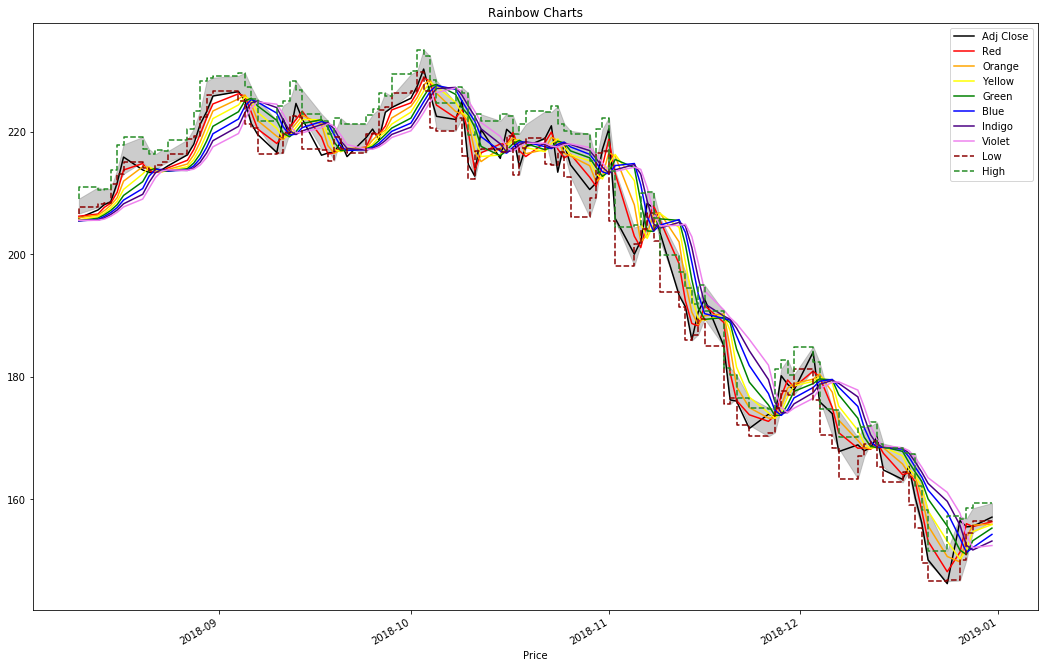

In [30]:
colors = ['k','r', 'orange', 'yellow', 'g', 'b', 'indigo', 'violet']
df[['Adj Close','Red','Orange','Yellow','Green','Blue','Indigo','Violet']].plot(colors=colors, figsize=(18,12))
plt.fill_between(df.index, df['Low'], df['High'], color='grey', alpha=0.4)
plt.plot(df['Low'], c='darkred', linestyle='--', drawstyle="steps")
plt.plot(df['High'], c='forestgreen', linestyle='--', drawstyle="steps")
plt.title('Rainbow Charts')
plt.legend(loc='best')
plt.xlabel('Price')
plt.show()